In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [2]:
hf = h5py.File('/u/scr/ethanchi/relationOutputs/fi-en-srl/projections.hdf5')


In [3]:
preds = np.load("/u/scr/ethanchi/relationOutputs/fi-en-srl/pred.npy", allow_pickle=True)
sentences = np.load("/u/scr/ethanchi/relationOutputs/fi-en-srl/sentences.npy", allow_pickle=True)

fix_duplicates = np.vectorize(lambda x: "|".join(set(x.split("|")) - {"A0", "A1", "A2", "A3"}) if x else "_")
preds = fix_duplicates(preds)
print(preds)


['_' '' '_' ... '_' '_' '_']


In [11]:
projections = hf.get('projections')

print(projections.shape)
is_adjunct = np.vectorize(lambda x: x and x.startswith('AM') and '|' not in x)
adjunct_projections = projections[is_adjunct(preds), :]
adjunct_preds = preds[is_adjunct(preds)]

is_adjunct_ambig = np.vectorize(lambda x: x and x.startswith('AM'))
projections_ambig = projections[is_adjunct_ambig(preds), :]
adjunct_preds_ambig = preds[is_adjunct_ambig(preds)]

print(projections.shape)

(33368, 2)
(33368, 2)


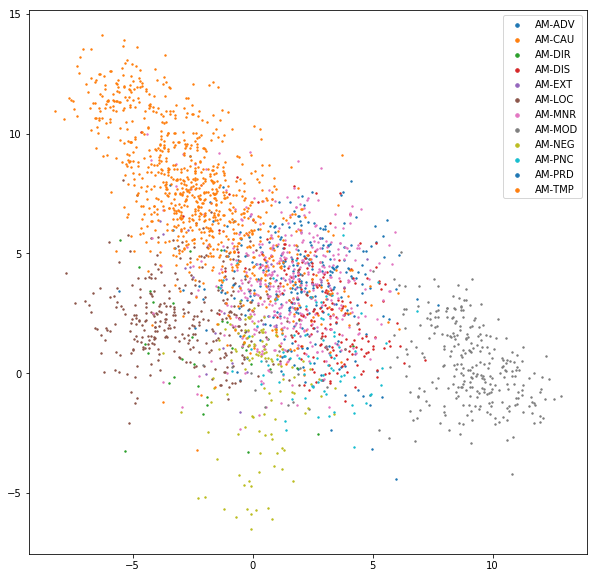

In [5]:
plt.figure(figsize=(10, 10))

for pred in np.unique(adjunct_preds):
  plt.scatter(adjunct_projections[adjunct_preds == pred][:, 0], adjunct_projections[adjunct_preds == pred][:, 1], s=2, alpha=1, label=pred)
plt.legend(markerscale=2.5, prop={'size': 10})
plt.show()

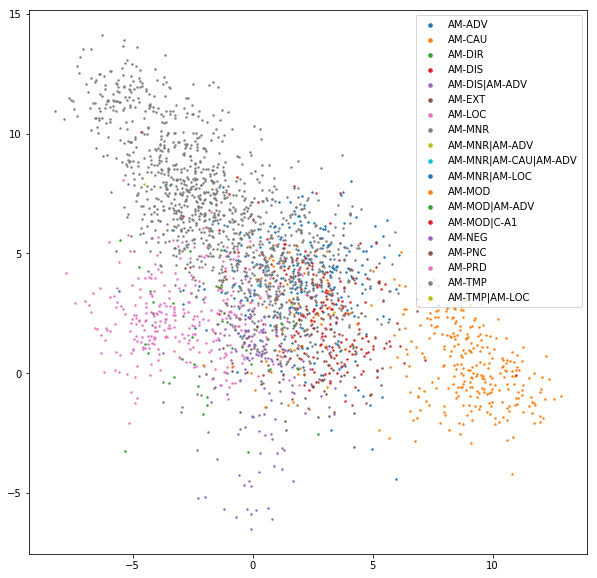

In [6]:
plt.figure(figsize=(10, 10))

for pred in np.unique(adjunct_preds_ambig):
  plt.scatter(projections_ambig[adjunct_preds_ambig == pred][:, 0], projections_ambig[adjunct_preds_ambig == pred][:, 1], s=2, alpha=1, label=pred)
plt.legend(markerscale=2.5, prop={'size': 10})
plt.show()

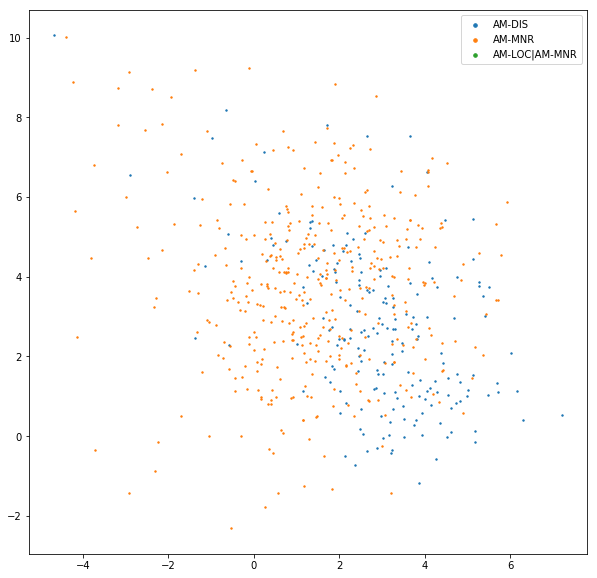

In [7]:
plt.figure(figsize=(10, 10))

for pred in ('AM-DIS', 'AM-MNR', 'AM-LOC|AM-MNR'):
  plt.scatter(adjunct_projections[adjunct_preds == pred][:, 0], adjunct_projections[adjunct_preds == pred][:, 1], s=2, alpha=1, label=pred)
plt.legend(markerscale=2.5, prop={'size': 10})
plt.show()

In [8]:
u_preds, counts = np.unique(preds, return_counts=True)
count_sort_idxs = np.argsort(-counts)
for u_pred, count in zip(u_preds[count_sort_idxs], counts[count_sort_idxs]):
  print(u_pred, count)

_ 22038
 8186
AM-TMP 841
AM-MNR 417
AM-LOC 322
AM-MOD 295
AM-ADV 271
AM-DIS 192
C-A1 138
AM-NEG 119
R-A0 113
A4 82
AM-PNC 79
R-A1 67
AM-EXT 47
AM-CAU 44
AM-DIR 34
R-AM-TMP 28
R-A1|R-A0 8
R-AM-LOC 8
R-AM-MNR 6
R-A2 4
AM-PRD 3
A5 3
AM-MNR|AM-ADV 3
AM-MOD|AM-ADV 2
C-A2 2
C-AM-MNR 2
R-AM-CAU 2
AM-TMP|AM-LOC 1
AA 1
R-AM-EXT 1
AM-DIS|AM-ADV 1
AM-MNR|AM-CAU|AM-ADV 1
AM-MOD|C-A1 1
AM-MNR|AM-LOC 1
C-AM-DIR 1
C-AM-CAU 1
C-A2|AM-ADV 1
R-A1|R-A0|R-A2 1
A4|AM-PNC 1
